<body>
    <font face="Century Gothic"  size="7"><p style="color:#1FB915";>Sustainable Tourism Index</p></font>
</body> 

### Joëlle Duff
___________________

## Abstract

In this notebook I create a composite index to measure sustainability in the tourism industry. The Sustainable Tourism Index was composed using Factor Analysis, where various observable variables were combined to form an unobservable factor, "Sustainable Tourism". I explain the importance and relevance of such an index, before discussing the method used to create it. I find that factor analysis is extremely suitable for creating such a composite index, since differential weighting is representative and realistic in attributing weight to the factor. Alternatively, instead of using several individual indices, it may be more valuable to calculate one index for all years, such that the scores can be compared over multiple years more reliably. 

![image](http://www.telta.de/te1801/fh/morwenna/Images/logointernet1.jpg) 

<a id="Research Question"></a>
## Research Question


#### *Can we create a reliable and representative composite index which measures sustainability in the tourism industry?*

I attempt to create such an index with data that is freely available to the public

## Motivation  - What is Sustainable Tourism and why do we need it?

#### *The impact of Tourism*
In the last decades tourism has become increasingly accessible to people around the world; with travel costs decreasing, and disposable income steadily rising, it has become more affordable for the population to travel and discover new places. In fact, in the 1950s 25 million international arrivals were recorded, whereas by 2015 this amount had risen to a staggering 1.2 billion arrivals (Sharpley and Telfer, 2014 and [WTTC, 2016](http://www.wttc.org/-/media/files/reports/economic-impact-research/regions-2016/world2016.ashx)). With the tourism industry now contributing almost 10% to global GDP annually, and employing over 300 million people worldwide, it is not surprising that it continues to have a tremendous impact on economic development. Besides GDP and employment, the industry also directly affects investments, export, consumption, and even wealth distribution. Distinct from many other sectors, the tourism industry provides an immensely diverse range of activities and products, thus generating an extensive value chain which impacts multiple other sectors.

#### *The need for Sustainability*
Unfortunately the development of tourism is paired with various production externalities which can damage long-term growth. Over-exploitation of and competition for natural resources directly affect the livelihood of local communities and stress regional biodiversity. Creaco and Querini ([2003](https://www.econstor.eu/handle/10419/115956)) note that the negative and irreversible effect of unplanned and uncontrolled growth actually destroys the unique natural and social resource foundation of tourism. Consequently, it is important to balance the use of social, environmental, and economic factors of tourism. With this in mind, the tourism industry is increasingly becoming more sustainable, and global institutions are focussing on stimulating this sustainable development through specific programmes such as the Sustainable Tourism – Eliminating Poverty (ST-EP) Initiative and the 10-Year Framework of Programmes on Sustainable Consumption and Production Patterns Sustainable Tourism Programme ([UNWTOb, 2016](http://step.unwto.org/content/background-and-objective) and [UNEP, 2016](http://www.unep.org/10yfp/Programmes/ProgrammeConsultationandCurrentStatus/Sustainabletourism/tabid/106269/Default.aspx )).

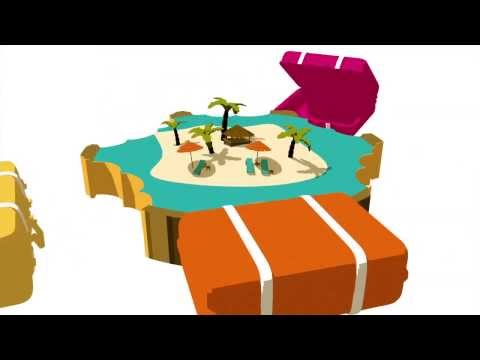

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("JFbbKbdqoJg")


## Method - How can we measure Sustainable Tourism?

#### *Measuring Sustainable Tourism*
With the UN introducing 2017 as the International Year of Sustainable Tourism ([Video Link for IY 2017](https://www.youtube.com/watch?v=fqkbdEVXzWE)), focus is increasingly on the measurement of sustainability in the industry, and on tracking its development. Since sustainability is a complex and multivariate concept, different methods have been proposed to quantify a composite index for the level of sustainable tourism. Such a composite would properly encase the multitude of elements inherent to sustainability and has been attempted in the following cases; Tourism Penetration Index, the Barometer of Tourism Sustainability, the Sustainable Tourism Index, the Sustainable Tourism Benchmarking Tool, and the Vectorial Dynamic Composite Indicator ([McElroy & De Albuquerque, 1998](http://www.sciencedirect.com/science/article/pii/S0160738397000686); [Ko, 2005](http://www.sciencedirect.com/science/article/pii/S026151770400041X); [Pulido Fernández & Sánchez Rivero, 2009](http://journals.sagepub.com/doi/abs/10.5367/000000009788254377); [Cernat & Gourdon, 2012](https://halshs.archives-ouvertes.fr/halshs-00557121/); & [Blancas et al., 2016](http://www.tandfonline.com/doi/abs/10.1080/09669582.2015.1122014)). Unfortunately however, many of the variables needed to create these composites are not (well) measured by data gathering institutions. With this in mind, I attempt to create a new index which is based on variables that are currently measured and available. 

#### *Data Sources*
After reviewing various data sources I decided that data from the World Economic Forum ([WEF](http://reports.weforum.org/travel-and-tourism-competitiveness-report-2015/)) and Yale were most relevant for this analysis. These organisations have collected data on the sustainable development of the tourism industry and on environmental performance, respectively, and are reliable and valid sources of data. The WEF publishes a Travel and Tourism Competitiveness Report every few years, which includes specific data on the tourism industry and sustainability. Yale developed the Environmental Performance Index ([EPI](http://epi.yale.edu/)), which is an index composed of environmental indicators, and publishes new scores each year on a country level. Data from 2007, 2008, 2009, 2011, 2013, and 2015 will be used from 144 countries. 

#### *Factor Analysis*
Factor analysis is a method often used to create composite indices, in particular for concepts of a complex social nature. It has the capacity to analyze correlations between observable variables and an unobservable variable, or factor. Factor analysis commences with observed variables, which are assumed to have some linear relation to the common factor, and then derives likely component variables (Mulaik, 2010). Instead of just using equal weighting for all variables, factor analysis filters out variables which are not relevant and attributes more realistic and accurate weightings to each of them. See these webpages for more information ([Short Introduction to Factor Analysis](http://www.theanalysisfactor.com/factor-analysis-1-introduction/), [A Beginner's Guide to Factor Analysis](http://tqmp.org/Content/vol09-2/p079/p079.pdf), [Confirmatory Factor Analysis](http://www.statisticssolutions.com/confirmatory-factor-analysis/), [Factor Analysis in Python](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html))

This study will use a confirmatory approach, combining observable variables which are expected to represent the common factor ‘Sustainable Tourism’. This factor will be composed using differentially weighted variables, similar to the ST index and Sustainable Tourism Benchmarking Tool created by Pulido-Fernandez & Sanchez-Rivero (2009) and Cernat & Gourdon (2012), respectively. This index will be based on different observable variables which are currently available for research. The number of selected variables is large during this stage, but will be reduced during the factor analysis, when their individual correlation is determined. 

#### *Observable Variables*
Sustainability incorporates three common dimensions, the economic, environmental, and social dimensions. This index will include the environmental and social aspects only, to avoid endogeneity when relating the index to economic development (this is a recommendation for the future which will be discussed later). Additionally, other relevant WEF report variables are included which could contribute to the factor, but which are not necessarily attributable to a specific dimension. The following equation will represent the final factor of Sustainable Tourism:

**$$ Sustainable \ Tourism \ Index_{ij} = \beta_1 \ S_{1ij} + \beta_2 \ S_{2ij} + ... + \beta_n \ S_{nij}$$**
 
where i and j respectively denote country and year, and where $S_n$ represents some of the independent variables mentioned above. In this equation, $\beta_n$ represents the so-called loading factors, which are better known as the correlations between the observable and unobservable variables.

The following factors are included in the dataset I composed:

##### Environmental
1. **Protected natural area** Nationally protected areas as percentage of total land area [WEF]
2. **EPI** The Environmental Performance Index (EPI) ranks countries’ performance on high-priority environmental issues in two areas: protection of human health and protection of ecosystems. Within these two policy objectives the EPI scores country performance in nine issue areas comprised of 20 indicators. Indicators in the EPI assess countries’ proximity to internationally established targets or, in the absence of agreed-upon targets, how individual nations compare relative to the best performing countries [EPI Yale]

##### Social
1. **Local satisfaction with tourism** Are foreign travelers and in particular tourists welcome in your country? (1 = no, citizens in my country do not welcome foreign travelers and tourists, 7 = yes, my country’s citizens are open and welcome foreign travelers and tourists) [WEF]
2. **World heritage sites** Number of World Heritage sites in the country [WEF, UNESCO original]
3. **Health services capacity** Physician density per 1,000 population [WEF, WHO original]
4. **Gender inequality** Employment-to-population ratio of Females [ILO modeled estimates] 

##### WEF Travel and Tourism Competitiveness Reports
1. **Government prioritisation of the travel and tourism industry** Is your country’s government taking the necessary steps to ensure that the T&T sector is being developed in a sustainable way?(1 = no, development of the sector does not take into account issues related to environmental protection and sustainable development,7 = yes, sustainable development issues are at the core of the government’s strategy with regard to the industry’s development) [WEF]
2. **Stringency of environmental regulations** How stringent is your country’s environmental regulation? (1 = lax compared to most countries, 7 = among the world’s most stringent) [WEF]
3. **Sustainability of travel and tourism industry** How would you assess the effectiveness of your government’s efforts to ensure that the T&T sector is being developed in a sustainable way? (1 = very ineffective—development of the sector does not take into account issues related to environmental protection and sustainable development; 7 = very effective—issues related to environmental protection and sustainable development are at the core of the government’s strategy) [WEF]

## Results

### Answer
I find that Factor Analysis works well as a method to create a composite index with differential weighting. It is able to process large datasets, with many observations per variable and country. The resulting ST Index is realistic and representative of many underlying variables. Using the same loading factors over the same variables each year, would provide an ST index which is comparable over many years.  


### Prepare Data

Below I first import necessary packages and import the data. I also convert data to numeric, which is necessary for further analysis. The table you see below is of 2015, as an example of the individual datasets. Columns represent the variables mentioned earlier, and the rows represent the countries. Row 0 is Albania, row 143 Zimbabwe.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA, FactorAnalysis

xls_file2007 = pd.ExcelFile("C:/Users/asus/Documents/Master/Thesis/Data/FactorAnalysis per Year/PythonSustainable2007.xlsx")
pd.to_numeric(xls_file2007, errors='coerce')

xls_file2007
xls_file2007.sheet_names

Sustain2007 = xls_file2007.parse('Blad1')

xls_file2008 = pd.ExcelFile("C:/Users/asus/Documents/Master/Thesis/Data/FactorAnalysis per Year/PythonSustainable2008.xlsx")
pd.to_numeric(xls_file2008, errors='coerce')

xls_file2008
xls_file2008.sheet_names

Sustain2008 = xls_file2008.parse('Blad1')

xls_file2009 = pd.ExcelFile("C:/Users/asus/Documents/Master/Thesis/Data/FactorAnalysis per Year/PythonSustainable2009.xlsx")
pd.to_numeric(xls_file2009, errors='coerce')

xls_file2009
xls_file2009.sheet_names

Sustain2009 = xls_file2009.parse('Blad1')

xls_file2011 = pd.ExcelFile("C:/Users/asus/Documents/Master/Thesis/Data/FactorAnalysis per Year/PythonSustainable2011.xlsx")
pd.to_numeric(xls_file2011, errors='coerce')

xls_file2011
xls_file2011.sheet_names

Sustain2011 = xls_file2011.parse('Blad1')

xls_file2013 = pd.ExcelFile("C:/Users/asus/Documents/Master/Thesis/Data/FactorAnalysis per Year/PythonSustainable2013.xlsx")
pd.to_numeric(xls_file2013, errors='coerce')

xls_file2013
xls_file2013.sheet_names

Sustain2013 = xls_file2013.parse('Blad1')

xls_file2015 = pd.ExcelFile("C:/Users/asus/Documents/Master/Thesis/Data/FactorAnalysis per Year/PythonSustainable2015.xlsx")
pd.to_numeric(xls_file2015, errors='coerce')

xls_file2015
xls_file2015.sheet_names

Sustain2015 = xls_file2015.parse('Blad1')

Sustain2015


,ProtectArea,EPI,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv,SustInd
0,9.5,73.14,NaN,1.145,33.356,4.200105,2.678866,3.994575
1,7.4,71.94,0.5,1.207,13.672,3.834122,2.789911,3.165064
2,12.1,50.83,NaN,0.166,55.589,2.757122,2.567622,2.167017
3,6.7,79.80,4.0,3.155,44.642,4.614444,3.409176,3.671476
4,8.1,81.24,NaN,2.687,44.469,5.018530,3.336461,3.711837
5,15.1,87.58,14.0,3.273,55.014,5.675631,5.563674,5.002163
6,23.6,85.68,NaN,4.830,51.825,6.138436,6.199835,5.677030
7,7.4,83.68,NaN,3.432,58.204,5.816292,3.944133,4.539214
8,6.8,70.86,NaN,0.913,37.565,5.399284,4.379755,4.328502
9,4.2,43.66,1.0,0.356,40.966,3.979071,3.166646,3.023210


### Descriptive Statistics

In [5]:
Sustain2007
Sustain2007.describe()

,ProtectArea,EPI,Satisfaction,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv
count,109.000000,142.000000,124.000000,105.000000,116.00000,143.000000,124.000000,124.000000
mean,11.131193,52.283239,6.322581,7.066667,1.84569,46.543587,4.474194,4.040323
std,10.407971,16.324255,0.400982,8.511606,1.29604,15.832559,0.942309,1.197417
min,0.000000,17.790000,4.900000,1.000000,0.10000,10.195000,2.400000,2.200000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,63.800000,86.690000,6.900000,43.000000,4.50000,85.554000,6.500000,6.700000


In [4]:
Sustain2008
Sustain2008.describe()

,ProtectArea,EPI,Satisfaction,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv,SustInd
count,127.000000,142.000000,129.000000,69.000000,127.000000,143.000000,129.000000,129.000000,129.000000
mean,12.121496,52.830000,6.336977,2.608696,1.730787,46.731713,5.048837,3.958527,4.685349
std,11.093054,16.362286,0.381694,2.680087,1.257168,15.944144,0.851222,1.033398,0.804699
min,0.070000,17.920000,4.850000,1.000000,0.020000,11.046000,2.940000,2.280000,2.740000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,62.950000,88.360000,6.820000,15.000000,4.400000,85.552000,6.710000,6.410000,6.340000


In [11]:
Sustain2009
Sustain2009.describe()

,ProtectArea,EPI,Satisfaction,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv,SustInd
count,133.000000,142.000000,133.000000,73.000000,132.000000,143.000000,133.000000,134.000000,133.000000
mean,12.520977,52.948521,6.357068,2.602740,1.761591,46.562028,5.463083,4.017761,4.765789
std,11.685139,16.343020,0.378261,2.701541,1.335420,15.797057,0.821996,0.991500,0.845084
min,0.100000,18.050000,4.830000,1.000000,0.020000,10.206000,3.050000,2.180000,2.490000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,65.700000,88.790000,6.870000,15.000000,5.000000,84.199000,6.850000,6.360000,6.480000


In [12]:
Sustain2011
Sustain2011.describe()

,ProtectArea,EPI,Satisfaction,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv,SustInd
count,139.000000,142.000000,139.000000,74.000000,138.000000,143.000000,139.000000,139.000000,139.000000
mean,11.251295,53.404366,6.182086,2.675676,1.746522,46.591413,5.253525,4.072302,4.353741
std,9.577232,16.272706,0.422915,2.809515,1.363433,15.832780,0.879882,1.063065,0.853234
min,0.070000,18.350000,4.590000,0.000000,0.010000,8.388000,2.660000,1.910000,2.060000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,50.180000,88.170000,6.900000,15.000000,5.350000,83.593000,6.840000,6.630000,6.250000


In [13]:
Sustain2013
Sustain2013.describe()

,EPI,Satisfaction,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv,SustInd
count,142.000000,139.000000,77.000000,139.000000,143.000000,139.000000,139.000000,139.000000
mean,68.921620,6.140504,2.727273,1.770072,46.798161,5.192878,4.095971,4.332734
std,14.191319,0.440358,2.904789,1.393333,15.617317,0.889771,1.106678,0.855210
min,35.130000,4.090000,1.000000,0.010000,8.148000,2.400000,1.470000,2.100000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,90.590000,6.830000,16.000000,6.170000,83.110000,6.790000,6.440000,6.250000


In [14]:
Sustain2015
Sustain2015.describe()

,ProtectArea,EPI,Heritage,HealthCap,GenderIneq,GovPrior,StringEnv,SustInd
count,135.000000,142.000000,80.00000,135.000000,143.000000,136.000000,136.000000,136.000000
mean,15.263704,70.170915,2.58125,1.762081,47.141972,5.148392,4.218566,4.349224
std,11.296470,13.737734,2.73450,1.435403,15.581087,0.901470,1.012196,0.837868
min,0.100000,36.560000,0.50000,0.008000,8.059000,2.321701,1.829067,1.988750
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,54.900000,90.740000,14.00000,7.739000,83.862000,6.710087,6.340268,6.485692


<a id="Findings"></a>
###### Findings
From the descriptives above we can see that most datapoints lie between 0 and 7, because they originate from survey questions which are measured on a likert scale. This is particularly useful because this means the ST index will also result in a balanced score. However, there are also extreme outliers which will affect the ST index later on. The variables ProtectArea, EPI, and GenderIneq all show much higher values, and will significantly alter the ST index scores when they are included in the calculation. This is not necessarily a problem, but must be taken into account when interpreting the ST Index scores, and comparing them over multiple years. 

### Factor Analysis

As I mentioned earlier, to create a composite index I must first perform the factor analyis. This analysis will result in a list of factor loadings, which represent the different weights I can attribute to each variable. Again, I only show the data for 2015, since the method is the same in each period. 

In [6]:
from sklearn import decomposition, preprocessing
import numpy as np
import pandas as pd

data2007 = Sustain2007
data2007 = data2007[~np.isnan(data2007).any(axis=1)] # take out values of NaN to ensure only numeric data remains
data_normal2007 = preprocessing.scale(data2007) #normalisation
fa2007 = decomposition.FactorAnalysis(n_components = 1) # decomposition
fa2007.fit(data_normal2007) # Factor analysis

data2008 = Sustain2008
data2008 = data2008[~np.isnan(data2008).any(axis=1)] 
data_normal2008 = preprocessing.scale(data2008) 
fa2008 = decomposition.FactorAnalysis(n_components = 1) 
fa2008.fit(data_normal2008) 

data2009 = Sustain2009
data2009 = data2009[~np.isnan(data2009).any(axis=1)] 
data_normal2009 = preprocessing.scale(data2009) 
fa2009 = decomposition.FactorAnalysis(n_components = 1) 
fa2009.fit(data_normal2009)  

data2011 = Sustain2011
data2011 = data2011[~np.isnan(data2011).any(axis=1)] 
data_normal2011 = preprocessing.scale(data2011)
fa2011 = decomposition.FactorAnalysis(n_components = 1) 
fa2011.fit(data_normal2011) 

data2013 = Sustain2013
data2013 = data2013[~np.isnan(data2013).any(axis=1)] 
data_normal2013 = preprocessing.scale(data2013) 
fa2013 = decomposition.FactorAnalysis(n_components = 1) 
fa2013.fit(data_normal2013) 
    
print Sustain2015

data2015 = Sustain2015
data2015 = data2015[~np.isnan(data2015).any(axis=1)]
data_normal2015 = preprocessing.scale(data2015)
fa2015 = decomposition.FactorAnalysis(n_components = 1)
fa2015.fit(data_normal2015)
for score in fa2015.score_samples(data_normal2015):
    print -score # Factor analysis scores

     ProtectArea    EPI  Heritage  HealthCap  GenderIneq  GovPrior  StringEnv  \
0            9.5  73.14       NaN      1.145      33.356  4.200105   2.678866   
1            7.4  71.94       0.5      1.207      13.672  3.834122   2.789911   
2           12.1  50.83       NaN      0.166      55.589  2.757122   2.567622   
3            6.7  79.80       4.0      3.155      44.642  4.614444   3.409176   
4            8.1  81.24       NaN      2.687      44.469  5.018530   3.336461   
5           15.1  87.58      14.0      3.273      55.014  5.675631   5.563674   
6           23.6  85.68       NaN      4.830      51.825  6.138436   6.199835   
7            7.4  83.68       NaN      3.432      58.204  5.816292   3.944133   
8            6.8  70.86       NaN      0.913      37.565  5.399284   4.379755   
9            4.2  43.66       1.0      0.356      40.966  3.979071   3.166646   
10           0.1  56.95       NaN      1.811      55.767  6.546030   4.433184   
11          24.5  79.56     

From the Factor Analysis scores above, I can compute the Factor Analysis Loadings. These loadings represent the differential weighting to be used in the final computation of the ST Index. 

In [7]:
Loading2007 = pd.DataFrame(fa2007.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv'))
Loading2007
print pd.DataFrame(-fa2007.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv'))
# gives the factor loadings

Loading2008 = pd.DataFrame(fa2008.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))
Loading2008
print pd.DataFrame(-fa2008.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))

Loading2009 = pd.DataFrame(fa2009.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))
Loading2009
print pd.DataFrame(-fa2009.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))

Loading2011 = pd.DataFrame(fa2011.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))
Loading2011
print pd.DataFrame(-fa2011.components_, columns=('ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))

Loading2013 = pd.DataFrame(fa2013.components_, columns=('EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))
Loading2013
print pd.DataFrame(-fa2013.components_, columns=('EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))

Loading2015 = pd.DataFrame(fa2015.components_, columns=('ProtectArea', 'EPI', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))
Loading2015
print pd.DataFrame(-fa2015.components_, columns=('ProtectArea', 'EPI', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'))


   ProtectArea       EPI  Satisfaction  Heritage  HealthCap  GenderIneq  \
0     0.286224  0.986312      0.018201  0.331698   0.709648    0.018977   

   GovPrior  StringEnv  
0   0.01186   0.777657  
   ProtectArea       EPI  Satisfaction  Heritage  HealthCap  GenderIneq  \
0     -0.08715  0.243535       0.68323  0.180948  -0.064265     0.04019   

   GovPrior  StringEnv   SustInd  
0  0.878366   0.552252  0.992939  
   ProtectArea       EPI  Satisfaction  Heritage  HealthCap  GenderIneq  \
0    -0.153331  0.162599      0.746392  0.164256  -0.042939    0.028881   

   GovPrior  StringEnv   SustInd  
0  0.941884   0.444508  0.973355  
   ProtectArea       EPI  Satisfaction  Heritage  HealthCap  GenderIneq  \
0    -0.155709  0.349313      0.667062  0.211852   0.069243    0.050142   

   GovPrior  StringEnv   SustInd  
0  0.828213   0.604534  0.970997  
        EPI  Satisfaction  Heritage  HealthCap  GenderIneq  GovPrior  \
0  0.381605      0.571026  0.237333   0.166761    0.167314  0.77

In [4]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.tools as tls
tls.set_credentials_file(username='JoelleDuff', api_key='NkSk1R88B7vYzL33bkuk')
import pandas as pd

data_matrix = [['Year', 'ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
               ['2007', 0.286224, 0.986312, 0.018201, 0.331698, 0.709648, 0.018977, 0.01186, 0.777657, 'NaN'],
               ['2008', -0.08715, 0.243535, 0.68323, 0.180948, -0.064265, 0.04019, 0.878366, 0.552252, 0.992939],
               ['2009', -0.153331, 0.162599, 0.746392, 0.164256, -0.042939, 0.028881, 0.941884, 0.444508, 0.973355],
               ['2011', -0.155709, 0.349313, 0.667062, 0.211852, 0.069243, 0.050142, 0.828213, 0.604534, 0.970997],
               ['2013', 'NaN', 0.381605, 0.571026, 0.237333, 0.166761, 0.167314, 0.777796, 0.685753, 0.970045],
               ['2015', 0.339649, 0.979355, 'NaN', 0.231035, 0.812514, -0.121435, 0.230918, 0.678779, 0.345624]]

table = FF.create_table(data_matrix, index=True, index_title='Year')
py.iplot(table, filename='Loading Factors')

The table above shows the loading factors clearly, for each year. To make it more clear which variables are most promising to include in the index, the following scatterplot is created:

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly.plotly as py
import plotly.graph_objs as go

trace2007 = go.Scatter(
    x=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    y=[0.286224, 0.986312, 0.018201, 0.331698, 0.709648, 0.018977, 0.01186, 0.777657, 'NaN'],
    text=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    mode='markers',
    name=2007,
    marker=dict(
        size=[100,100,100,100,100,100,100,100,100],
        sizemode='area',
    )
)
trace2008 = go.Scatter(
    x=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    y=[-0.08715, 0.243535, 0.68323, 0.180948, -0.064265, 0.04019, 0.878366, 0.552252, 0.992939],
    text=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    mode='markers',
    name=2008,
    marker=dict(
        size=[100,100,100,100,100,100,100,100,100],
        sizemode='area',
    )
)
trace2009 = go.Scatter(
    x=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    y=[-0.153331, 0.162599, 0.746392, 0.164256, -0.042939, 0.028881, 0.941884, 0.444508, 0.444508],
    text=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    mode='markers',
    name=2009,
    marker=dict(
        size=[100,100,100,100,100,100,100,100,100],
        sizemode='area',
    )
)
trace2011= go.Scatter(
    x=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    y=[-0.155709, 0.349313, 0.667062, 0.211852, 0.069243, 0.050142, 0.828213, 0.604534, 0.970997],
    text=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    mode='markers',
    name=2011,
    marker=dict(
        size=[100,100,100,100,100,100,100,100,100],
        sizemode='area',
    )
)
trace2013= go.Scatter(
    x=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    y=['NaN', 0.381605, 0.571026, 0.237333, 0.166761, 0.167314, 0.777796, 0.685753, 0.970045],
    text=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    mode='markers',
    name=2013,
    marker=dict(
        size=[100,100,100,100,100,100,100,100,100],
        sizemode='area',
    )
)
trace2015= go.Scatter(
    x=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    y=[0.339649, 0.979355, 'NaN', 0.231035, 0.812514, -0.121435, 0.230918, 0.678779, 0.345624],
    text=['ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
    mode='markers',
    name=2015,
    marker=dict(
        size=[100,100,100,100,100,100,100,100,100],
        sizemode='area',
    )
)
data = [trace2007, trace2008, trace2009, trace2011, trace2013, trace2015]
py.iplot(data, filename='bubblechart-size-ref')

This scatterplot shows the distribution of the loadings for each variable and for each year. A method often used to choose which variables will be included, is to chose those that are greater than $0.3$. Furthermore, from this scatterplot we see that several variables are particularly important within the factor, as they return each year. **Satisfaction, GovPrior, StringEnv,** and **SustInd** are often above $0.5$.  





### Sustainability Index Scores Calculation

Now we will construct the Sustainability Index scores, based on the loading factors given earlier. The method is repeated each year, using the corresponding loading factors in the table below. 

In [6]:
data_loadings = [['Indicator', '2007', 'Indicator', '2008', 'Indicator', '2009', 'Indicator', '2011', 'Indicator', '2013', 'Indicator', '2015'],
               ['EPI', 0.986, 'SustInd', 0.993, 'SustInd', 0.973, 'SustInd', 0.971, 'SustInd', 0.970, 'EPI', 0.979],
               ['StringEnv', 0.778, 'GovPrior', 0.878, 'GovPrior', 0.942, 'GovPrior', 0.828, 'GovPrior', 0.778, 'HealthCap', 0.812],
               ['HealthCap', 0.710, 'Satisfaction', 0.683, 'Satisfaction', 0.746, 'Satisfaction', 0.667, 'StringEnv', 0.686, 'StringEnv', 0.679],
               ['Heritage', 0.332, 'StringEnv', 0.552, 'StringEnv', 0.445, 'StringEnv', 0.605, 'Satisfaction', 0.571, 'SustInd', 0.346],
                ['-', '-', '-', '-', '-', '-', 'EPI', 0.349, 'EPI', 0.382, 'ProtectArea', 0.340]]

table2 = FF.create_table(data_loadings)
py.iplot(table2, filename='LoadingFactorsReduced')

These are the corresponding function for each Sustainable Tourism Index:

$\ $

$$Sustainable \ Tourism \  Index \ (2007) = 0,986 \ EPI + 0,778 \ StringEnv + 0,71 \ HealthCap + 0,332 \ Heritage$$

$$Sustainable \ Tourism  \ Index \ (2008) = 0,993 \ SustInd + 0,878 \ GovPrior + 0,683 \ Satisfaction + 0,552 \ StringEnv$$

$$Sustainable \ Tourism \ Index \ (2009) = 0,973 \ SustInd + 0,942 \ GovPrior + 0,746 \ Satisfaction + 0,445 \ StringEnv$$

$$Sustainable \ Tourism \ Index \ (2011) = 0,971 \ SustInd + 0,828 \ GovPrior + 0,667 \ Satisfaction + 0,605 \ StringEnv + 0,349 \ EPI$$ 

$$Sustainable \ Tourism  \ Index \ (2013) = 0,97 \ SustInd + 0,778 \ GovPrior + 0,686 \ StringEnv + 0,571\ Satisfaction + 0,382\ EPI$$

$$Sustainable\ Tourism\  Index \ (2015) = 0,979\ EPI + 0,812\ HealthCap + 0,679\ StringEnv + 0,346\ SustInd + 0,34\  ProtectArea$$


Below I have created matrices for the loading factors and datasets, such that $STVar2007$ represents the combination of $MatrixST2007$ (loading factors) and $MatrixVar2007$ (variables of dataset which are included). Then, the seperate columns of $STVar2007$ are summed together to create the ST index, $ST2007$. This method is used for each period.

In [11]:
MatrixST2007=[0.986, 0.778, 0.71, 0.332] # (1,4) matrix of loading factors
MatrixVar2007=Sustain2007[['EPI', 'StringEnv', 'HealthCap', 'Heritage']].values # (144,4) matrix of variables per country
STVar2007=MatrixST2007*MatrixVar2007 # combination of previous matrices
ST2007=np.sum([STVar2007], axis=2) 
ST2007=zip([ST2007])
ST2007=np.reshape(ST2007, (144,1))# sum seperate colums of new (144,4) matrix to create (114,1) matrix, where the new column shows the scores. 

MatrixST2008=[0.993, 0.878, 0.683, 0.552]
MatrixVar2008=Sustain2008[['SustInd', 'GovPrior', 'Satisfaction', 'StringEnv']].values
STVar2008=MatrixST2008*MatrixVar2008
ST2008=np.sum([STVar2008], axis=2)
ST2008=zip([ST2008])
ST2008=np.reshape(ST2008, (144,1))

MatrixST2009=[0.973, 0.942, 0.746, 0.445]
MatrixVar2009=Sustain2009[['SustInd', 'GovPrior', 'Satisfaction', 'StringEnv']].values
STVar2009=MatrixST2009*MatrixVar2009
ST2009=np.sum([STVar2009], axis=2)
ST2009=zip([ST2009])
ST2009=np.reshape(ST2009, (144,1))

MatrixST2011=[0.971, 0.828, 0.667, 0.605, 0.349]
MatrixVar2011=Sustain2011[['SustInd', 'GovPrior', 'Satisfaction', 'StringEnv', 'EPI']].values
STVar2011=MatrixST2011*MatrixVar2011
ST2011=np.sum([STVar2011], axis=2)
ST2011=zip([ST2011])
ST2011=np.reshape(ST2011, (144,1))

MatrixST2013=[0.97, 0.778, 0.686, 0.571, 0.382]
MatrixVar2013=Sustain2013[['SustInd', 'GovPrior', 'StringEnv', 'Satisfaction', 'EPI']].values
STVar2013=MatrixST2013*MatrixVar2013
ST2013=np.sum([STVar2013], axis=2)
ST2013=zip([ST2013])
ST2013=np.reshape(ST2013, (144,1))

MatrixST2015=[0.979, 0.812, 0.679, 0.346, 0.34]
MatrixVar2015=Sustain2015[['EPI', 'HealthCap', 'StringEnv', 'SustInd', 'ProtectArea']].values
STVar2015=MatrixST2015*MatrixVar2015
ST2015=np.sum([STVar2015], axis=2)
ST2015=zip([ST2015])
ST2015=np.reshape(ST2015, (144,1))

ST=np.concatenate([ST2007,ST2008], axis=1) # Combine all ST index scores into one matrix containing all years
ST=np.concatenate([ST,ST2009], axis=1)
ST=np.concatenate([ST,ST2011], axis=1)
ST=np.concatenate([ST,ST2013], axis=1)
ST=np.concatenate([ST,ST2015], axis=1)
print ST 


[[  55.7045       13.22739      14.6333       32.94164      40.22614
    78.9648732 ]
 [  54.7829       14.20833      13.56946      30.78834      36.61203
    76.9148061 ]
 [          nan           nan           nan   20.30713              nan
    56.50456498]
 [  54.78108      14.23779      14.68431      30.77933      43.77547
    86.5492211 ]
 [  63.64588      14.74822      15.23773      35.12867      43.05613
    88.01955651]
 [  91.97812      18.30376      18.87045      46.12517      50.47845
    99.04097894]
 [  86.1268       19.1062       19.43592      46.94045      50.74361
   102.00062016]
 [  59.63164      14.49796      16.64417      34.26006      46.78999
    91.47413836]
 [  55.61964      15.65555      16.90264      35.11366      42.49414
    76.89681159]
 [  28.48002      12.49383      13.23652      21.38548      28.05586
    47.65639557]
 [          nan   18.31559      19.27034      34.19201      38.69009
    61.99439818]
 [  75.91606      16.86513      17.51757      39.63

### Sustainable Tourism Index Result

The table printed below, shows the final ST Index scores per year, per country

In [11]:
STFull = pd.ExcelFile("C:/Users/asus/Documents/Master/AEA I/ST Score Python.xlsx")
pd.to_numeric(STFull, errors='coerce')
STFull
STFull.sheet_names
STFull = STFull.parse('Blad1')
STFull

,Countries,2007,2008,2009,2011,2013,2015
0,Albania,55.70450,13.22739,14.63330,32.94164,40.22614,78.964873
1,Algeria,54.78290,14.20833,13.56946,30.78834,36.61203,76.914806
2,Angola,NaN,NaN,NaN,20.30713,NaN,56.504565
3,Argentina,54.78108,14.23779,14.68431,30.77933,43.77547,86.549221
4,Armenia,63.64588,14.74822,15.23773,35.12867,43.05613,88.019557
5,Australia,91.97812,18.30376,18.87045,46.12517,50.47845,99.040979
6,Austria,86.12680,19.10620,19.43592,46.94045,50.74361,102.000620
7,Azerbaijan,59.63164,14.49796,16.64417,34.26006,46.78999,91.474138
8,Bahrain,55.61964,15.65555,16.90264,35.11366,42.49414,76.896812
9,Bangladesh,28.48002,12.49383,13.23652,21.38548,28.05586,47.656396


In [183]:
print STFull

                  Countries      2007      2008      2009      2011      2013  \
0                   Albania  55.70450  13.22739  14.63330  32.94164  40.22614   
1                   Algeria  54.78290  14.20833  13.56946  30.78834  36.61203   
2                    Angola       NaN       NaN       NaN  20.30713       NaN   
3                 Argentina  54.78108  14.23779  14.68431  30.77933  43.77547   
4                   Armenia  63.64588  14.74822  15.23773  35.12867  43.05613   
5                 Australia  91.97812  18.30376  18.87045  46.12517  50.47845   
6                   Austria  86.12680  19.10620  19.43592  46.94045  50.74361   
7                Azerbaijan  59.63164  14.49796  16.64417  34.26006  46.78999   
8                   Bahrain  55.61964  15.65555  16.90264  35.11366  42.49414   
9                Bangladesh  28.48002  12.49383  13.23652  21.38548  28.05586   
10                 Barbados       NaN  18.31559  19.27034  34.19201  38.69009   
11                  Belgium 

To show the results more clearly, I create a line graph below, which shows the trend in ST scores for several countries. Due to limitations in space, only the first few and last few countries in the dataset are shown below (Albania, Barbados, Burundi, Singapore, Sweden, and United Kingdom).  

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

Albania = go.Scatter(
    x = ['2007', '2008', '2009', '2011', '2013', '2015'],
    y = [55.70450, 13.22739, 14.63330, 32.94164, 40.22614, 78.964873],
    text=['2007', '2008', '2009', '2011', '2013', '2015'],
    name='Albania',
    line=dict(
        shape='spline')
)
Barbados = go.Scatter(
    x = ['2007', '2008', '2009', '2011', '2013', '2015'],
    y = ['Nan', 18.31559, 19.27034, 34.19201, 38.69009, 61.994398],
    text=['2007', '2008', '2009', '2011', '2013', '2015'],
    name='Barbados',
    line=dict(
        shape='spline')
)
Burundi = go.Scatter(
    x = ['2007', '2008', '2009', '2011', '2013', '2015'],
    y = ['Nan', 11.91487, 12.78301, 20.38951, 27.02672, 46.622036],
    text=['2007', '2008', '2009', '2011', '2013', '2015'],
    name='Burundi',
    line=dict(
        shape='spline')
) 
Singapore = go.Scatter(
    x = ['2007', '2008', '2009', '2011', '2013', '2015'],
    y = ['Nan', 19.60847, 20.05713, 47.77074, 52.65162, 94.220296],
    text=['2007', '2008', '2009', '2011', '2013', '2015'],
    name='Singapore',
    line=dict(
        shape='spline')
)
Sweden = go.Scatter(
    x = ['2007', '2008', '2009', '2011', '2013', '2015'],
    y = [88.43342, 17.49914, 18.43893, 45.34532, 50.95157, 100.942513],
    text=['2007', '2008', '2009', '2011', '2013', '2015'],
    name='Sweden',
    line=dict(
        shape='spline')
)
UnitedKingdom = go.Scatter(
    x = ['2007', '2008', '2009', '2011', '2013', '2015'],
    y = [90.59648, 16.94227, 17.04695, 43.27964, 50.48223, 103.090195],
    text=['2007', '2008', '2009', '2011', '2013', '2015'],
    name='United Kingdom',
    line=dict(
        shape='spline')
)
data = [Albania, Barbados, Burundi, Singapore, Sweden, UnitedKingdom]
layout = dict(title = 'Sustainable Tourism Index Trend',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'ST Index (Score)'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='STindex scores')

### Sensitivity Analysis

To check if we get realistic and accurate results, I will compare these results with those I found using the statistical programme R. I performed the same anlysis in this programme earlier, and find that the loading factors resemble those calculated by R. Although the loadingfactors are not exactly the same, they are often very similar and in the same direction. This comparison helps support the results found in this python programming. 

In [8]:
Rloadings = pd.ExcelFile("C:/Users/asus/Documents/Master/AEA I/Rdata.xlsx")
pd.to_numeric(Rloadings, errors='coerce')
Rloadings
Rloadings.sheet_names
Rloadings = Rloadings.parse('Blad2')
print Rloadings

data_matrix = [['Year', 'ProtectArea', 'EPI', 'Satisfaction', 'Heritage', 'HealthCap', 'GenderIneq', 'GovPrior', 'StringEnv', 'SustInd'],
               ['2007', 0.286224, 0.986312, 0.018201, 0.331698, 0.709648, 0.018977, 0.01186, 0.777657, 'NaN'],
               ['2008', -0.08715, 0.243535, 0.68323, 0.180948, -0.064265, 0.04019, 0.878366, 0.552252, 0.992939],
               ['2009', -0.153331, 0.162599, 0.746392, 0.164256, -0.042939, 0.028881, 0.941884, 0.444508, 0.973355],
               ['2011', -0.155709, 0.349313, 0.667062, 0.211852, 0.069243, 0.050142, 0.828213, 0.604534, 0.970997],
               ['2013', 'NaN', 0.381605, 0.571026, 0.237333, 0.166761, 0.167314, 0.777796, 0.685753, 0.970045],
               ['2015', 0.339649, 0.979355, 'NaN', 0.231035, 0.812514, -0.121435, 0.230918, 0.678779, 0.345624]]

table = FF.create_table(data_matrix, index=True, index_title='Year')
py.iplot(table, filename='Loading Factors')

      ProtectArea   EPI  Satisfaction  Heritage  HealthCap  GenderIneq  \
2007         0.27  0.99          0.09      0.29       0.69       -0.09   
2008         0.05  0.32          0.57      0.18       0.01        0.04   
2009        -0.03  0.27          0.70      0.17       0.06        0.01   
2011        -0.03  0.36          0.67      0.21       0.11        0.09   
2013          NaN  0.37          0.57      0.24       0.20        0.10   
2015         0.07  0.43           NaN      0.20       0.32        0.08   

      GovPrior  StringEnv  SustInd  
2007      0.14       0.78      NaN  
2008      0.85       0.59     1.00  
2009      0.92       0.48     0.95  
2011      0.87       0.64     0.96  
2013      0.77       0.74     0.95  
2015      0.84       0.75      NaN  


## Conclusion, Discussion, and Future Research

The results I got from performing this analysis in python give me similar results as in R. From this, I can conclude that Factor Analysis is a good method for creating a composite index with many underlying variables. The ST index seems to work very well for each year, and is well equipped to give quick insight into the sustainability of a county's tourism industry. So, to answer the [research question](#Research Question).. Yes!

There are some caveats to my approach though, which would need to be considered for future research.
Some datasets missed certain variables, which meant that the factor loadings differed each year. In particular, for 2007, 2013, and 2015 the datasets differed quite a lot, as did the ST index scores. Fortunately, during 2008, 2009, and 2011 the same variables were included in the ST index, making the indices of those years more comparable with eachtother. Unfortunately however, the scores of 2007, 2013, and 2015 included variables such as ProtectedArea, EPI, and GenderIneq, which, as mentioned [earlier](#Findings), had much higher values than the other indicators. For this reason, the ST index scores of 2007, 2013, and 2015 are much higher than those of the other years.

In the future it would be good to use only those variables for the index which are included in each dataset, and perhaps exclude certain years if they lack important variables. This way the indices over multiple years would be comparable, and important insights could be made. A second option would be to make a single ST index, which combines the individual ones by averaging the loading factors. This would make the scores even more comparable, since they would all be calculated in the same way. 

<a href='Research Question'></a>
<a href='Findings'></a>